<img src="media/Cryo+ESA_Logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# Exercise: Plotting grounding line locations and Velocities for the Pine Island and Thwaites glacier

The velocity and grounding line CCI datasets from the open data portal, allow a closer look at some of the Antarctic glaciers. Two large glaciers, which are undergoing a rapid change at the moment are the Thwaites glacier and Pine Island glacier. I this exercise you'll plot the grounding lines and glacier velocities.

## Preparations
If you haven't done so please follow the [Cate tutorial](https://www.futurelearn.com/courses/understanding-climate-change-using-satellite-climate-data/1/steps/1230976) to get started using the Jupyter notebook exercises.

## Cate software and the open data portal

We'll be querying the open data portal for sea ice concentration products as produced by the [Climate Change Initiative Sea Ice project](https://climate.esa.int/en/projects/sea-ice/). The [**open data portal**](https://climate.esa.int/en/odp/#/dashboard) hosts a variety of datasets on the [Jasmin infrastructure on the UK](https://jasmin.ac.uk/). These can be queried using the dedicated [Cate python module](https://cate.readthedocs.io/en/latest/). Cate allows retrieving data from the data portal and the web-interface which you find at [cate.climate.esa.int](https://cate.climate.esa.int) is build upon it.

In this Jupyter notebook exercise we will directly call Cate functions, and it will show you how these can be used in advanced workflows.

## Starting the exercise
To perform the exercise and execute the code in this notebook you can run it through the [mybinder.org](https://mybinder.org/) service by clicking on the binder link below (if resources allow it). Alternatively, you can download/clone the notebooks from [github](https://github.com/CCI-Tools/cate-edu) and run them through your own Jupyter notebook instance (this may initially take more time to setup, but does allow you to store your changes and extend the notebooks exercises to your own needs).

[![click to run this notebook on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CCI-Tools/cate-edu/HEAD?filepath=ECVs%2F11_Glaciergeometry_velo-exercise.ipynb)

or [clone the notebook repository on github](https://github.com/CCI-Tools/cate-edu)

## Step 1: loading python modules and initialize the data store pool

In [1]:
# To get things started we need to initialize a few things
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_POOL
import cate.ops as ops
from cate.ops.io import open_dataset

# the following is needed to run Cate in a Jupyter Notebook
from xcube.util.ipython import enable_asyncio
enable_asyncio()

# utilities
from IPython.display import display
import numpy as np
from datetime import datetime
import os

In [2]:
#initialize the local data store
data_store = DATA_STORE_POOL.get_store('local')

## Step 2: Download Shapefiles and a Tiff file
The grounding lines are contained within shapefiles and the glacier velocity in a georeferenced Tiff file. We will download these files and register them in the local cate store.

In [3]:
#setup some trings to name the datasources and files (Grounding lines)
dsid = "local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler"
basen = "20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler"
shpfile = os.path.join(dsid, f"{basen}.shp")


#setup some trings to name the datasources and files (velocity geotiffs)
fileN = "ais_cci_iv_PIG_S1avg_v20160125_v1_vv.tif"
vdsid = "local.AIS_CCI_IV_PIG_S1"
tiffFile = os.path.join(vdsid, fileN)


In [4]:
#Download the Pine island glacier grounding line shapefiles and make them available through cate
import os
import requests
import urllib.request
from datetime import datetime
from cate.core.ds import DataAccessError

# Download shapefiles of the grounding line locations
rooturl = "https://data.cci.ceda.ac.uk/thredds/fileServer/esacci/ice_sheets_antarctica/data/grounding_line_locations/Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/v2.0_cci_subset/"
urls = [f"{rooturl}00README_catalogue_and_licence.txt"]
basen = "20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler"
for suf in [".shp", ".dbf", ".shx", ".prj"]:
    urls.append(f"{rooturl}{basen}{suf}")


#directory to download the data to. For the datasource naming to be consistent but make sure it's located in the _store_dir directory of your local datastore and the subdirectory start with 'local.'' 
downloadDir = os.path.join(data_store.root, dsid)

os.makedirs(downloadDir, exist_ok=True)
for url in urls:
    r = requests.get(url)
    fileOut = os.path.join(downloadDir, os.path.basename(url))
    if os.path.exists(fileOut):
        print(f"Already downloaded, skipping {fileOut}")
        continue
    print(f"Downloading {fileOut}")
    with open(fileOut,'wb') as fid:
        fid.write(r.content)


#create a new datasource and add the *shp file
try:
    data_store.register_data(dsid, shpfile)
except DataAccessError:
    #OK since it already registered
    pass

#also download the geotiff of averaged absolute velocities of the Pine Island and Thwaites glacier
vrooturl = "ftp://anon-ftp.ceda.ac.uk/neodc/esacci/ice_sheets_antarctica/data/ice_velocity/pine_island_glacier/v1.0/ais_cci_iv_PIG_S1t065_20141010_20160121_v160427/"

#This is an alternative datasource mirror so it will run in mybinder (which doesn't allow ftp downloads)
vrooturl = "https://raw.githubusercontent.com/CCI-Tools/cate-edu/main/binder/alternative_data/"

vdownloadDir = os.path.join(data_store.root, vdsid)
os.makedirs(vdownloadDir, exist_ok=True)

with urllib.request.urlopen(vrooturl+fileN) as r:
    fileOut = os.path.join(vdownloadDir, fileN)
    if os.path.exists(fileOut):
        print(f"Already downloaded, skipping {fileOut}")
    else:
        with open(fileOut,"wb") as fid:
            print(f"Downloading {fileOut}")
            fid.write(r.read())

        
try:
    vds = data_store.register_data(vdsid, tiffFile)
except DataAccessError:
    #OK dataset is already registered
    pass



Already downloaded, skipping /home/alicja/.cate/data_stores/local/local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/00README_catalogue_and_licence.txt
Already downloaded, skipping /home/alicja/.cate/data_stores/local/local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler.shp
Already downloaded, skipping /home/alicja/.cate/data_stores/local/local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler.dbf
Already downloaded, skipping /home/alicja/.cate/data_stores/local/local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler.shx
Already downloaded, skipping /home/alicja/.cate/data_stores/local/local.AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler/20170428_090554_AIS_CCI_GLL_Ferrigno_PineIS_Thwaites_Smith_Pope_Kohler.prj
Already downloaded, skipping /

## Step 3: load the data and visualize them
The grounding lines will be loaded into a geopandas dataframe, whereas the velocity image will be opened using rasterio.

In [6]:
#Until cate supports reading shapefiles directly through the datastore read the shapefiles from a file
from cate.ops import read_geo_data_frame
import xarray as xr

PinesGLL = read_geo_data_frame(os.path.join(data_store.root, shpfile))

#also read the tiff file with absolute velocities
velo = xr.open_rasterio(os.path.join(data_store.root, tiffFile))
#mask nodatavalues (so they won't be plotted)
velo = velo.where(velo != velo.nodatavals[0])


/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


We can now create a figure with both the velocities and grounding line locations.

/tmp/ipykernel_8339/474317265.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(-106.749997, -75.499998, "Thwaites glacier", transform=ccrs.PlateCarree(), FontSize=16)
/tmp/ipykernel_8339/474317265.py:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.text(-99,-75.4, "Pine Island glacier", transform=ccrs.PlateCarree(), FontSize=16)


Text(0.5, 1.0, 'Pine Island and Thwaites averaged glacier velocities [m/day] and a selection of grounding lines')

/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/cartopy/mpl/feature_artist.py:208: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  c = matplotlib.collections.PathCollection(paths,
/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/alicja/miniconda3/envs/cate-env/lib/python3.9/site-packages

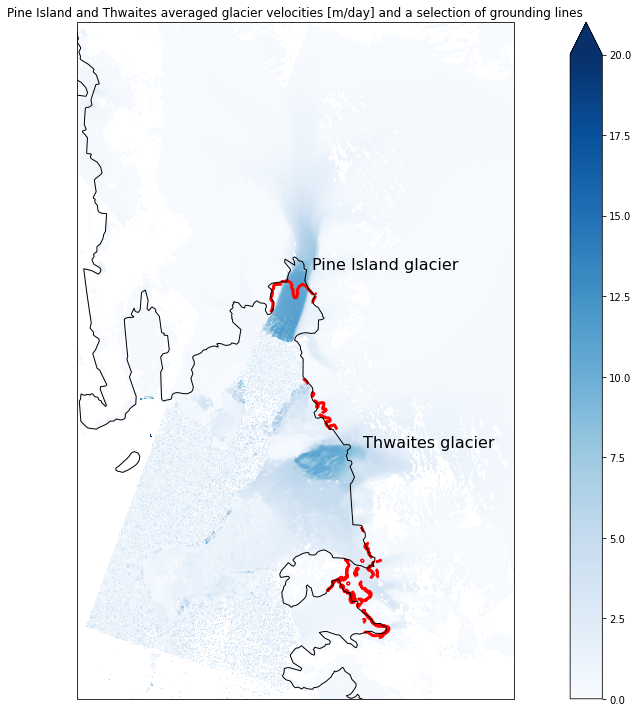

In [7]:
# create a plot of the velocities and grounding lines of Pine Island and Thwaites glacier
%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as mpl
import rasterio.plot

mpl.figure(figsize=(16, 10))
#note the projection below corresponds to the EPSG 3031 which is the samge projection as used by the ice velocity Geotiff
crs = ccrs.SouthPolarStereo(0, true_scale_latitude=-71)

ax = mpl.subplot(projection=crs)
velo[0,:,:].plot.imshow(ax=ax, vmin=0, vmax=20, cmap="Blues")

#plot the grounding lines
PinesGLLReproject = PinesGLL.to_crs(crs.proj4_init)
ax.add_geometries(PinesGLLReproject.geometry, 
                  crs=crs,
                  edgeColor='red',
                  faceColor='none',
                  lineWidth=3)
ax.coastlines(resolution='10m')

#add some labels to recognize the glaciers
ax.text(-106.749997, -75.499998, "Thwaites glacier", transform=ccrs.PlateCarree(), FontSize=16)
ax.text(-99,-75.4, "Pine Island glacier", transform=ccrs.PlateCarree(), FontSize=16)

ax.set_title("Pine Island and Thwaites averaged glacier velocities [m/day] and a selection of grounding lines")


# Questions (share your answers in the forum and discuss)
1. Can you spot the glacier front of the Pine Island glacier? 
2. Why is there such big difference between the location of the glacier front and the grounding line?
3. The grounding line for the Thwaites glacier is not shown, were would you expect to find it?
4. Try plotting a scalebar on top of the plot to get an idea for the dimensions of the glaciers 